## Real-Time Face Mask Detector



<div class="alert alert-block alert-info"> 
During pandemic COVID-19, we had to put on masks to protect the others to protect against the virus. In this tutorial we will develop a machine learning project – Face Mask Detector with Python.
</div>


We will build a real-time system to detect whether the person on the webcam is wearing a mask or not. We will train the face mask detector model using Keras and OpenCV.

## Training the detector 

#### Import all the libraries and modules required.

In [2]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

#### Build the neural network

In [2]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

#### Image Data Generation/Augmentation

In [11]:
# Let's try to open images 
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

TRAINING_DIR = "./Dataset/train"
VALIDATION_DIR = "./Dataset/test"
target = ['without_mask', 'with_mask']


In [4]:


# Training data
path = Path(TRAINING_DIR+'/'+target[0]).rglob("*")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
            
path = Path(TRAINING_DIR+'/'+target[1]).rglob("*")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
            
# Validation data            
path = Path(VALIDATION_DIR+'/'+target[1]).rglob("*")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
            
path = Path(VALIDATION_DIR+'/'+target[1]).rglob("*")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2966: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


Dataset\train\without_mask\indian-ethnicity-cheerful-confident-studio-260nw-552325924.jpg


In [7]:
# delete the image that can't be read 
import os
os.remove("./Dataset/train/without_mask/indian-ethnicity-cheerful-confident-studio-260nw-552325924.jpg")

In [8]:
# re try the verification 
path = Path(TRAINING_DIR+'/'+target[0]).rglob("*")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [56]:
def show_image(images,title):
    plt.figure(figsize=(16, 8))    
    for i in range(5) :
        plt.subplot(2, 5, i+1)
        #img = PIL.Image.open(img_p)
        plt.imshow(images[i], cmap='gray')
        plt.title(title)
        plt.tight_layout()
    plt.show()

<Figure size 1152x576 with 0 Axes>

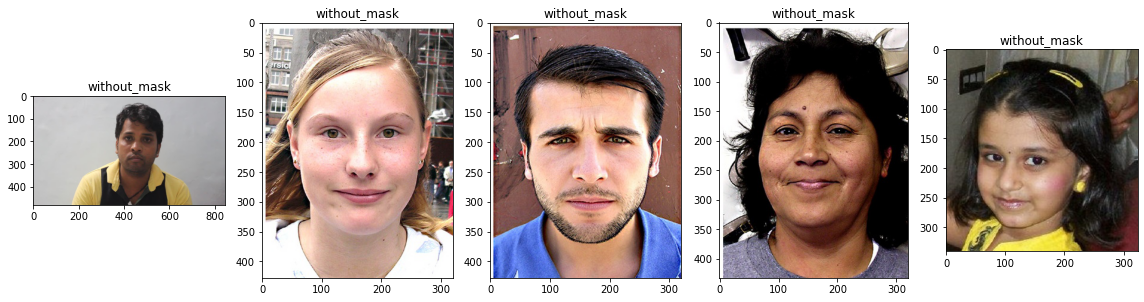

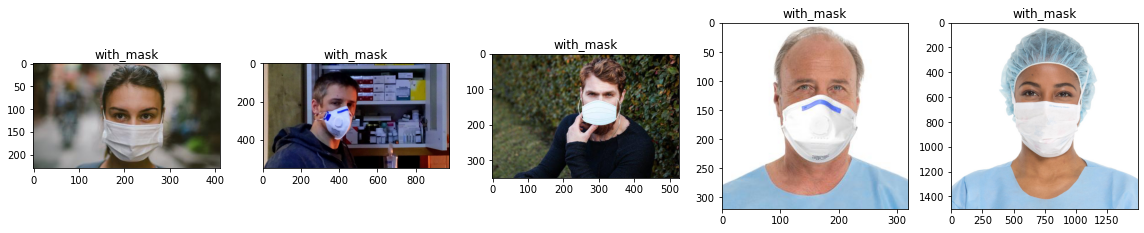

In [57]:
i = 0
plt.figure(figsize=(16, 8))
for j in range(len(target)):
    images = [PIL.Image.open(file) for file in Path(TRAINING_DIR+'/'+target[j]).rglob("*")]    
    show_image(images,target[j])
   

In [4]:

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [5]:
print (train_generator.class_indices)

{'with_mask': 0, 'without_mask': 1}


#### Initialize a callback checkpoint to keep saving best model after each epoch while training

In [12]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=False,mode='auto')

#### Train the model

In [13]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator,callbacks=[checkpoint])

Epoch 1/10
132/132 [==============================] - ETA: 0s - loss: 0.6683 - acc: 0.6400WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model2-001.model\assets
132/132 [==============================] - 47s 354ms/step - loss: 0.6683 - acc: 0.6400 - val_loss: 0.3047 - val_acc: 0.8918
Epoch 2/10
132/132 [==============================] - 48s 362ms/step - loss: 0.4442 - acc: 0.8014 - val_loss: 0.1680 - val_acc: 0.9742
Epoch 3/10
132/132 [==============================] - 47s 359ms/step - loss: 0.2940 - acc: 0.8813 - val_loss: 0.1267

In [60]:
model.save('mask_detector.h5')

## Testing the detector 

In [6]:
# Link to download  face_cascade  and eye_cascade
# https://github.com/opencv/opencv/tree/master/data/haarcascades
    
import numpy as np
import cv2
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

#img = cv2.imread('./Dataset/test/without_mask/384.jpg', cv2.COLOR_BGR2RGB)
#plt.imshow(img, cmap='gray')
#img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## To detect face masks in an image 

In [23]:
import os
test_images_0 = os.listdir(VALIDATION_DIR+'/'+target[0])
test_images_1 = os.listdir(VALIDATION_DIR+'/'+target[1])



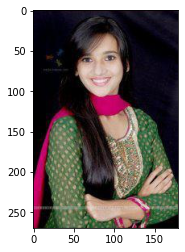

In [35]:
import cv2
import numpy as np
from keras.models import load_model

# Load the model trained
model=load_model("mask_detector.h5")
i = 0
img = cv2.imread('./Dataset/test/without_mask/'+test_images_0[i] )
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')


In [37]:
(im.shape[1] // size, im.shape[0] // size)

(45, 67)

In [48]:
[v * size for v in f]

[244, 208, 124, 124]

In [49]:
(x, y, w, h)

(244, 208, 124, 124)

In [50]:
im[y:y+h, x:x+w]

array([], shape=(62, 0, 3), dtype=uint8)

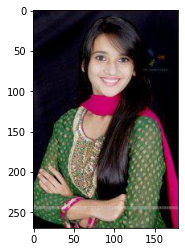

In [63]:
labels_dict={0:'without mask',1:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4


# We load the xml file --> use to detect face 
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

im = img.copy()
im=cv2.flip(im,1,1) #Flip to act as a mirror

# Resize the image to speed up detection
mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

# detect MultiScale / faces 
faces = classifier.detectMultiScale(mini)

# Draw rectangles around each face
for f in faces:
    print('ues')
    (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
    #Save just the rectangle faces in SubRecFaces
    face_img = im[y:y+h, x:x+w]
    resized=cv2.resize(face_img,(150,150))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,150,150,3))
    reshaped = np.vstack([reshaped])
    result=model.predict(reshaped)
    print(result)

    label=np.argmax(result,axis=1)[0]

    cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    
# Show the image
plt.imshow(im, cmap='gray')


In [64]:
 classifier.detectMultiScale(mini)

()

In [30]:
import cv2
import numpy as np
from keras.models import load_model

model=load_model("mask_detector.h5")


labels_dict={0:'without mask',1:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file --> use to detect face 
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE Face Mask Detector ',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

In [2]:
%run test.py